In [1]:
import sys
import os
baseDir = os.path.join('ml-100k')
#u.user
inputPath = os.path.join(baseDir, 'u.user')
print inputPath

ml-100k/u.user


In [3]:
user_data = sc.textFile(inputPath)

In [4]:
user_data.first()

u'1|24|M|technician|85711'

In [5]:
user_fields = user_data.map(lambda line: line.split("|"))

In [12]:
print type(user_fields)

<class 'pyspark.rdd.PipelinedRDD'>


In [7]:
num_users = user_fields.map(lambda fields: fields[0]).count()
print num_users

943


In [8]:
num_genders = user_fields.map(lambda fields:fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields:fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields:fields[4]).distinct().count()
print "Users: %d, genders: %d, occupations: %d, ZIP codes: %d" % (num_users, num_genders, num_occupations, num_zipcodes)

Users: 943, genders: 2, occupations: 21, ZIP codes: 795


In [10]:
#create a histogram to analyze the distribution of user ages, using matplotlib's hist function

ages = user_fields.map(lambda x: int(x[1])).collect()
hist(ages, bins=20, color='lightblue', normed=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

NameError: name 'hist' is not defined

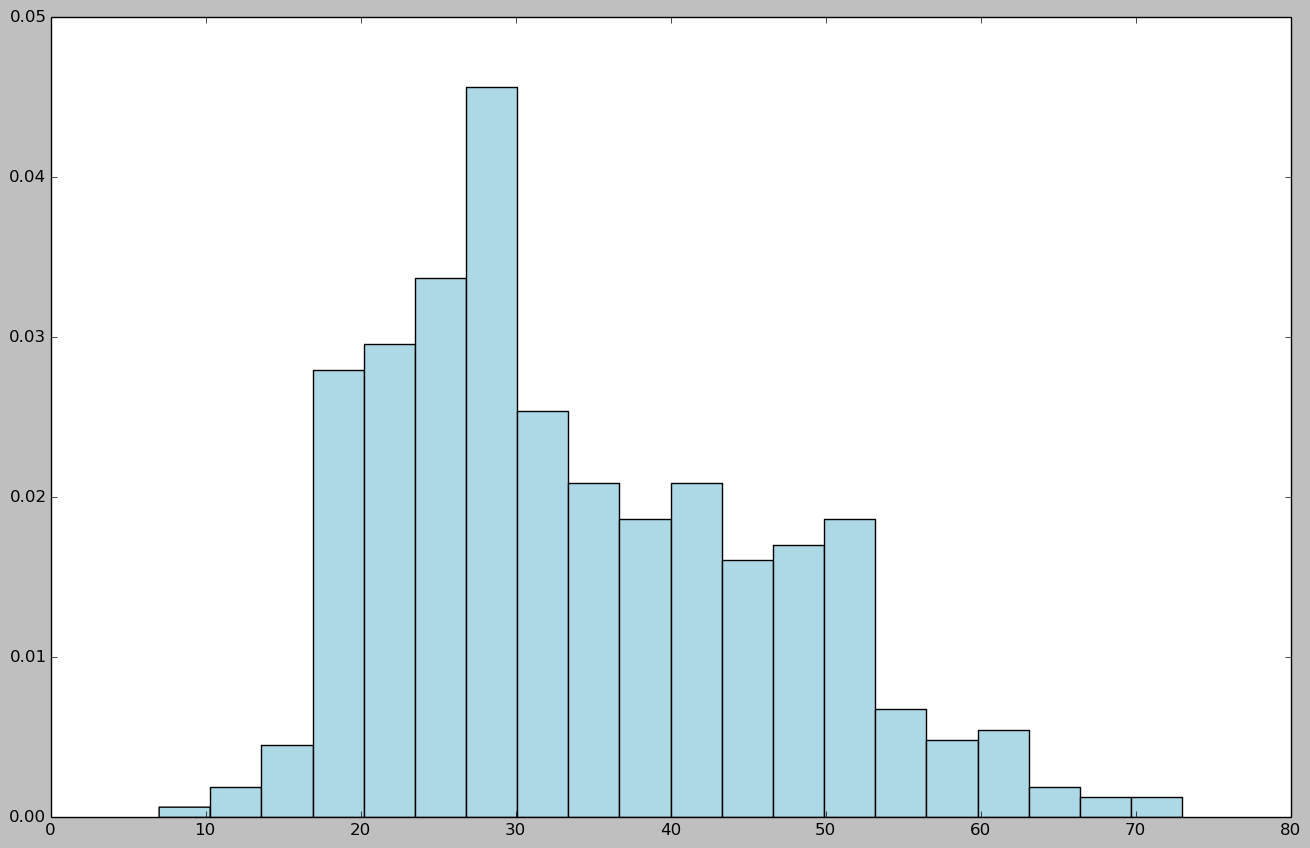

In [11]:
#comparring with the above error to see the proper way to import the matplotlib.pyplot as plt and how to use it
import matplotlib.pyplot as plt
from numpy.random import normal

ages = user_fields.map(lambda x: int(x[1])).collect()
plt.hist(ages, bins=20, color='lightblue', normed=True)
fig = plt.gcf()
fig.set_size_inches(16, 10)
'''
We passed in the ages array, together with the number of bins for our histogram
(20 in this case), to the hist function. Using the normed=True argument, we also
specified that we want the histogram to be normalized so that each bucket represents
the percentage of the overall data that falls into that bucket.
'''

In [13]:
'''We might also want to explore the relative frequencies of the various occupations
of our users. We can do this using the following code snippet. First, we will use
the MapReduce approach introduced previously to count the occurrences of each
occupation in the dataset. Then, we will use matplotlib to display a bar chart of
occupation counts, using the bar function.
Since part of our data is the descriptions of textual occupation, we will need to
manipulate it a little to get it to work with the bar function'''

count_by_occupation = (user_fields.map(lambda fields: (fields[3], 1))
                    .reduceByKey(lambda x, y: x + y).collect())
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])

NameError: name 'np' is not defined

In [14]:
import numpy as np

count_by_occupation = (user_fields.map(lambda fields: (fields[3], 1))
                    .reduceByKey(lambda x, y: x + y).collect())
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])


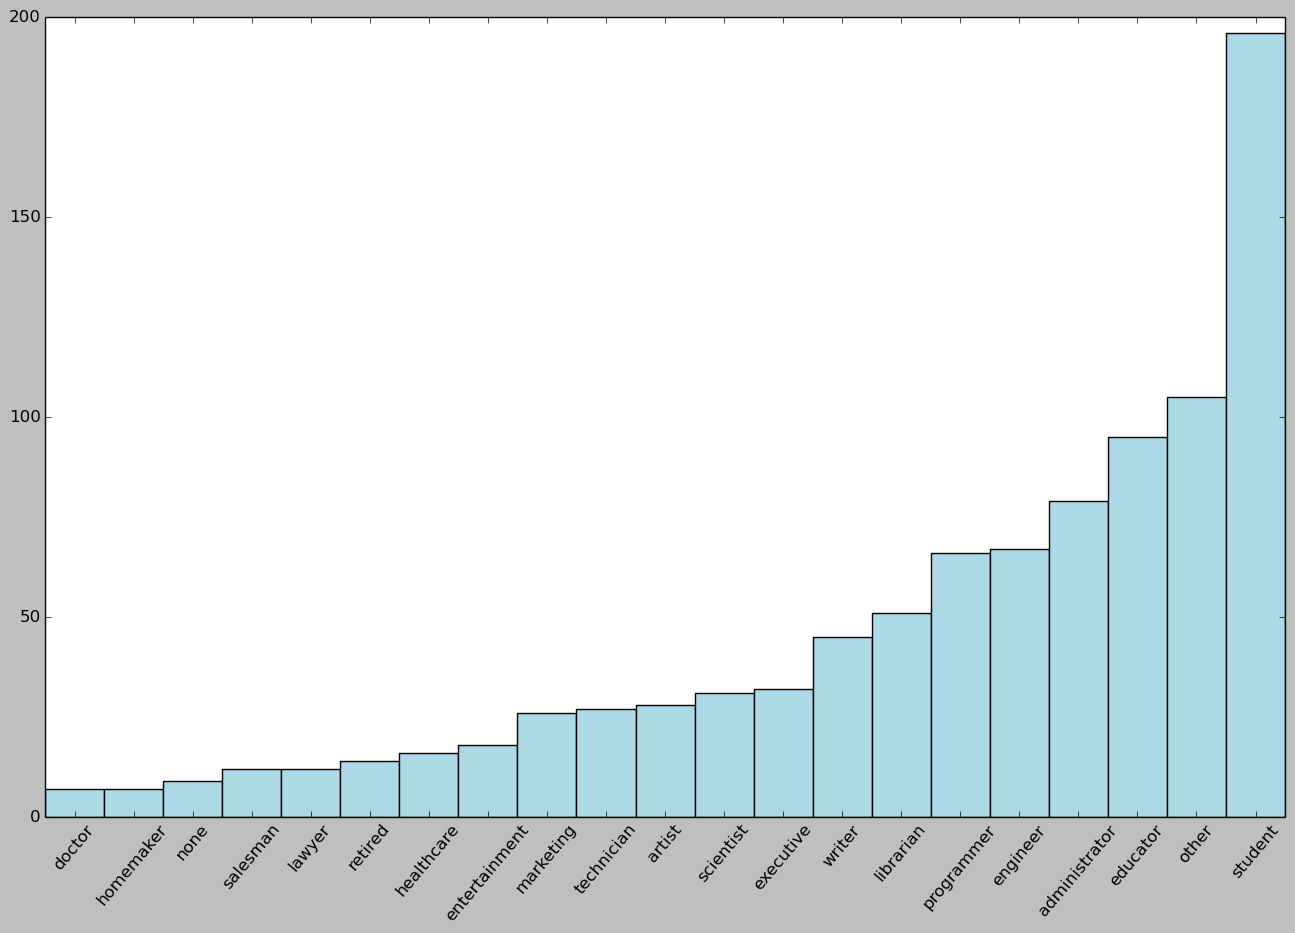

In [17]:
'''Once we have collected the RDD of counts per occupation, we will convert it into two
arrays for the x axis (the occupations) and the y axis (the counts) of our chart. The
collect function returns the count data to us in no particular order. We need to sort
the count data so that our bar chart is ordered from the lowest to the highest count.'''

x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

pos = np.arange(len(x_axis))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)
plt.bar(pos, y_axis, width, color='lightblue')
plt.xticks(rotation=50)
fig = plt.gcf()
fig.set_size_inches(16, 10)

In [ ]:
'''counts the occurrences of each unique value in the RDD and returns it to the
driver as a Python dict method (or a Scala or Java Map method). We can create the
count_by_occupation variable using this method'''

count_by_occupation2 = user_fields.map(lambda fields: fields[3]).
countByValue()
print "Map-reduce approach:"
print dict(count_by_occupation2)
print ""
print "countByValue approach:"
print dict(count_by_occupation)